# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
#import seaborn as sns
import scipy.stats as stats

### Load Data

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [17]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

### 1. Is the distribution of body temperatures normal?

#### Plot the Data

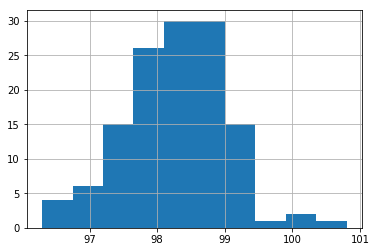

In [19]:
df.temperature.hist()

<b>Result:</b>The above plot is not strongly the familiar bell-shape,but it is a rough approximation.

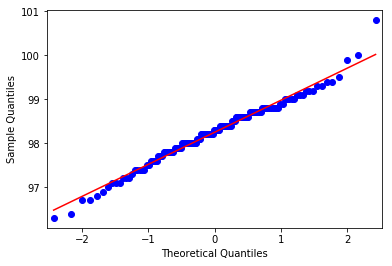

In [22]:
qqplot(df.temperature, line='s')
plt.show()

<b>Result:</b>There are a few small deviations at the bottom of the plot. But, the rest of the data is closely fitting the expected pattern.

In [12]:
stats.normaltest(df["temperature"])

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

<b>Result:</b> The p-value obtained is approximately 0.258 which is much greater than 0.05. Therefore, the temperature values are normally distributed.

### 2. Is the sample size large? Are the observations independent?

In [23]:
len(df)

130

There are only 130 observations and thus the sample size looks small. 
<br> <br>
But according to the <b>Central Limit Theorem</b>, we require only 30 samples to satisfy the CLT conditions.So, let's conclude that the sample size is large enough.

Statistical independence implies that the occurrence of one event does not affect the probability of the other. 
<br>The observations are that of temperature,heart rate and gender of some people. Thus, it can be assumend that the measurements of temperature and heart rate for one person is not affected by the measurements of another person i.e.<b>The samples are statistically independent.</b> 


### 3. Is the true population mean really 98.6 degrees F?

<ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

#### 3.1 Bootstrap hypothesis test

<b>Null Hypothesis:</b> The true temperature mean is 98.6 degrees F.
<br><b>Alternate Hypothesis:</b> The true temperature mean is <b>NOT</b> 98.6 degrees F.

In [76]:
np.random.seed(134)
sample_mean = np.mean(df.temperature)
print('sample mean: {:.3f}'.format(sample_mean))
sample_std = np.std(df.temperature)
print('sample standard deviation: {:.3f}'.format(sample_std))
# draw bootstrap samples
bs_replicates = np.empty(10000)
sample_temp = df.temperature.values
# Generate replicates
for i in range(10000):
    bs_replicates[i] = np.mean(np.random.choice(sample_temp, len(sample_temp)))
# compute p-value
p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
print('p-value =', p)

sample mean: 98.249
sample standard deviation: 0.730
p-value = 0.0


The p-value is zero which is very low. Thus we reject the null hyposthesis..

<b>Would you use a one-sample or two-sample test? Why?</b>
<br>One-sample must be used because we are given only one sample and the mean of the population.
<br><br><b>In this situation, is it appropriate to use the  t or 𝑧 statistic?</b>
<br>In this situation, it is more appropriate to use z-statistic. This is because the sample size is greater than 30  and the samples are normally-distributed and the variance is known for the samples.

In [51]:
n = len(df['temperature'])
SE = sample_std / np.sqrt(n)
z = (sample_mean - 98.6) / SE
print('z-statistic: {:.3f}'.format(z))
p = stats.norm.sf(abs(z))*2
print('p-value: {:.3f}'.format(p))

z-statistic: -5.476
p-value: 0.000


The z-value tells us that the temperature would lie -5.48 standard deviations beyond the assumed mean. The p-value obtained is extremely small. Thus, We can safely disregard the null hypothesis.

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
<ul>
    <li>Which one is the correct one to use?
        <br> Since the sample size is small < 30, we will check the t statistic this time
        <br>
    <li>What do you notice? What does this tell you about the difference in application of the  t and 𝑧 statistic?
</ul>

In [79]:
sample = np.random.choice(df["temperature"], size=10)
sample

array([98.7, 99.2, 97.8, 98.4, 98.9, 97.8, 98.6, 98. , 98.1, 98.6])

In [80]:
print('Sample Mean: {:.3f}'.format(sample.mean()))
print('Sample Std: {:.3f}'.format(np.std(sample)))
t = (sample.mean() - 98.6) / (np.std(sample)/np.sqrt(len(sample)))
print('t-statistic: {:.3f}'.format(t))
p = stats.norm.sf(abs(t))*2
print('p-value: {:.3f}'.format(p))

Sample Mean: 98.410
Sample Std: 0.450
t-statistic: -1.334
p-value: 0.182


Now the p-value is higher. At 0.05 we would accept the Null Hypothesis. Thus with the smaller sample of data, it can be concluded that the mean temperature of human body is 98.6.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

<ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
</ul>

<b>95% confidence interval

In [64]:
print(np.percentile(df["temperature"],[2.5,97.5]))

[96.7225 99.4775]


<b> Margin of Error

In [61]:
# margin of error
margin_err = 1.96 * SE
print("Margin of error:",margin_err)
min_temp, max_temp = (sample_mean - margin_err),(sample_mean + margin_err)
print("Normal Temperature is in between :",min_temp,"and",max_temp)

Margin of error: 0.125550964802579
Normal Temperature is in between : 98.12367980442819 and 98.37478173403336


Thus the body temperature below 98.1 and above 98.4 can be considered as abnormal.

### 6. Is there a significant difference between males and females in normal temperature?

<ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
</ul>

In [71]:
male_temp = df[df['gender'] == 'M']["temperature"]
female_temp = df[df['gender'] == 'F']["temperature"]
print("Mean of Male Temperature: ",np.mean(male_temp))
print("Mean of Female Temperature: ",np.mean(female_temp))
print("Standard Deviation of Male Temperature: ",np.std(male_temp))
print("Standard Deviation of Female Temperature: ",np.std(female_temp))

Mean of Male Temperature:  98.1046153846154
Mean of Female Temperature:  98.39384615384613
Standard Deviation of Male Temperature:  0.6933598841828696
Standard Deviation of Female Temperature:  0.7377464486428966


Thus, from the above calculations, it seems that the mean of temperature for male and female varies slightly and that's true for even the standard deviation.
<br><br>Now for hypothesis testing, the following are defined:
<br>
<b>Null Hypothesis:</b> The true mean temperature for men and women are the same.
<br>
<b>Alternate Hypothesis:</b> The true mean temperature for men and women are <b>NOT</b> the same.

In [75]:
mean_diff = (np.mean(male_temp) - np.mean(female_temp))
# calculate z-value, two_sample test
z = mean_diff / np.sqrt(((male_temp.std() ** 2)/ len(male_temp)) + ((female_temp.std() ** 2)/ len(female_temp)))
print('z-statistic: {:.3f}'.format(z))
p = stats.norm.sf(abs(z))*2
print('p-value: {:.3f}'.format(p))

z-statistic: -2.285
p-value: 0.022


Since the p-value (0.022) is smaller than the significance level (0.05), so we can reject the Null hypothesis. <br>Therefore, there is a statistically-significant difference between the mean body temperatures of males and females.

### Data Story From Statistical Analysis

Well, we can conclude three things from this data sample:
<br>1. The common knowledge that the average humand body temp is 98.6 is not True. 
<br>2. In fact, The average body temperature is calculated to be 98.2 degrees. 
<br>3. Gender can play a role in Average Temp of the Human Body